In [25]:
%matplotlib inline
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [26]:
#Declaration of functions
def drawCommunities(G, partition, pos):
    # G is graph in networkx form
    # Partition is a dict containing info on clusters
    # Pos is nase on netorkx spring layout (nx.spring_layout(G))
    
    # For seperating conmunities colors
    dictList = defaultdict(list)
    nodeList = []
    for node, com in partition.items():
        dictList[com].append(node)
    
    # Get size of Communities
    size = len(set(partition.values()))
    
    # For loop to assign communities colors
    for i in range(size):
        
        amplifier = i % 3
        multi = (i/3) * 0.3
        
        red = green = blue = 0
        
        if amplifier == 0:
            red = 0.1 + multi
        elif amplifier == 1:
            green = 0.1 + multi
        else:
            blue = 0.1 + multi
            
        # Draw Nodes
        nx.draw_networkx_nodes(G, pos,
                              nodelist = dictList[i],
                              node_color = [0.0 + red, 0.0 + green, 0.0 + blue],
                              node_size = 500,
                              alpha = 0.8)
        
    # Draw edges and final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha= 0.5)

def listToDict(list):
    listdict = {}

    for i in range(len(list)):
        listdict[i] = list[i]

    return listdict
    
def graphToEdgeMatrix(G):
    # Initialize Edge MAtrix
    edgeMat = [[0 for x in range(len(G))] for y in range(len(G))]
    
    # For loop to set 0 or 1 (Diagonal elements are set to 1)
    for node in G:
        tempNeighList = G.neighbors(node)
        for neighbor in tempNeighList:
            edgeMat[node][neighbor] = 1
        edgeMat[node][node] = 1
    
    return edgeMat

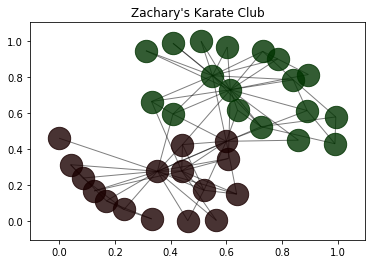

In [27]:
# Initialize some variables to help us with the generalization of the program
kClusters = 2 
results = []
nmiResults = []
arsResults = []

# Load and Store both data and groundtruth of  Zachary's Karate Club
G = nx.karate_club_graph()
groundTruth = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]

#Transform graph data into matrix form
edgeMat = graphToEdgeMatrix(G)

# Positions the nodes using Fruchterman-Reingold force-directed algorithm
# Look up online for description
pos = nx.spring_layout(G)
drawCommunities(G, listToDict(groundTruth), pos)

In [28]:
#------------------------------
#Spectal Clustering Model
spectral = cluster.SpectralClustering(n_clusters=kClusters, affinity="precomputed", n_init=200)
spectral.fit(edgeMat)

# Transform data to list form and store them in results list
results.append(list(spectral.labels_))

/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


In [29]:
#-------------------------------
# Agglomerative Clustering Model
agglomerative = cluster.AgglomerativeClustering(n_clusters = kClusters, linkage="ward")
agglomerative.fit(edgeMat)

#Transform data to list form and store them in results list
results.append(list(agglomerative.labels_))

In [30]:
#-------------------------------
# K_means clustering model
kmeans = cluster.KMeans(n_clusters=kClusters, n_init=200)
kmeans.fit(edgeMat)

#Transform data to list form and store in results list
results.append(list(kmeans.labels_))


In [31]:
#------------------------------
#Affinity Propogation Clustering Model
affinity = cluster.affinity_propagation(S=edgeMat, max_iter=200, damping=0.6)

#Transform data to list form and store in reults list
results.append(list(affinity[1]))

# Append the results into lists
for x in results:
    nmiResults.append(normalized_mutual_info_score(groundTruth,x))
    arsResults.append(adjusted_rand_score(groundTruth, x))


<function matplotlib.pyplot.show>

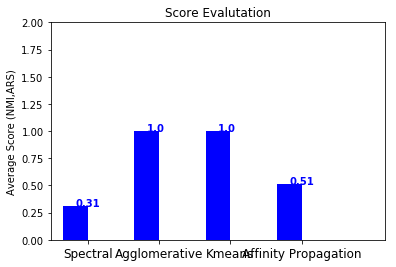

In [32]:

#-------------------------------
#Code for plotting results

#Average of NMI and ARS
y = [sum(x) / 2 for x in zip(nmiResults, arsResults)]

xlabels = ['Spectral', 'Agglomerative', 'Kmeans', 'Affinity Propagation']

fig = plt.figure()
ax = fig.add_subplot(111)

# Set parameters for plotting
ind = np.arange(len(y))
width = 0.35

# Create barchart and set the axis limits and titles
ax.bar(ind, y, width, color='blue', error_kw=dict(elinewidth=2, ecolor='red'))
ax.set_xlim(-width, len(ind) + width)
ax.set_ylim(0,2)
ax.set_ylabel('Average Score (NMI,ARS)')
ax.set_title('Score Evalutation')

#Add the xlabels to the chart
ax.set_xticks(ind + width / 2)
xtickNames = ax.set_xticklabels(xlabels)
plt.setp(xtickNames, fontsize=12)

# Add the actual value on top of each chart
for i, v in enumerate(y):
    ax.text(i, v, str(round(v, 2)), color='blue', fontweight='bold')

# Show the final plot
plt.show